# TensorFlow를 활용한 로지스틱 회귀 실습

이 노트북에서는 TensorFlow를 사용하여 간단한 로지스틱 회귀문제를 풀어봅니다.
여기서는 iris 데이터셋을 사용하여 꽃의 종류를 분류하는 예제를 다룹니다.

## 주요 단계
1. 데이터 불러오기 및 전처리
2. 모델 정의 (Dense Layer)
3. 손실 함수 및 최적화 방법 설정
4. 학습 진행 및 시각화


## 로지스틱 회귀 vs 선형 회귀 비교

두 모델의 차이점을 실제 데이터로 확인해보겠습니다.


=== 데이터 생성 및 준비 ===
회귀 데이터: X shape=(200, 2), y shape=(200,)
분류 데이터: X shape=(200, 2), y shape=(200,)
분류 데이터 클래스 분포: [105  95]


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/3131848975.py:45: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/3131848975.py:45: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/3131848975.py:45: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/3131848975.py:45: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/3131848975.py:45: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykerne

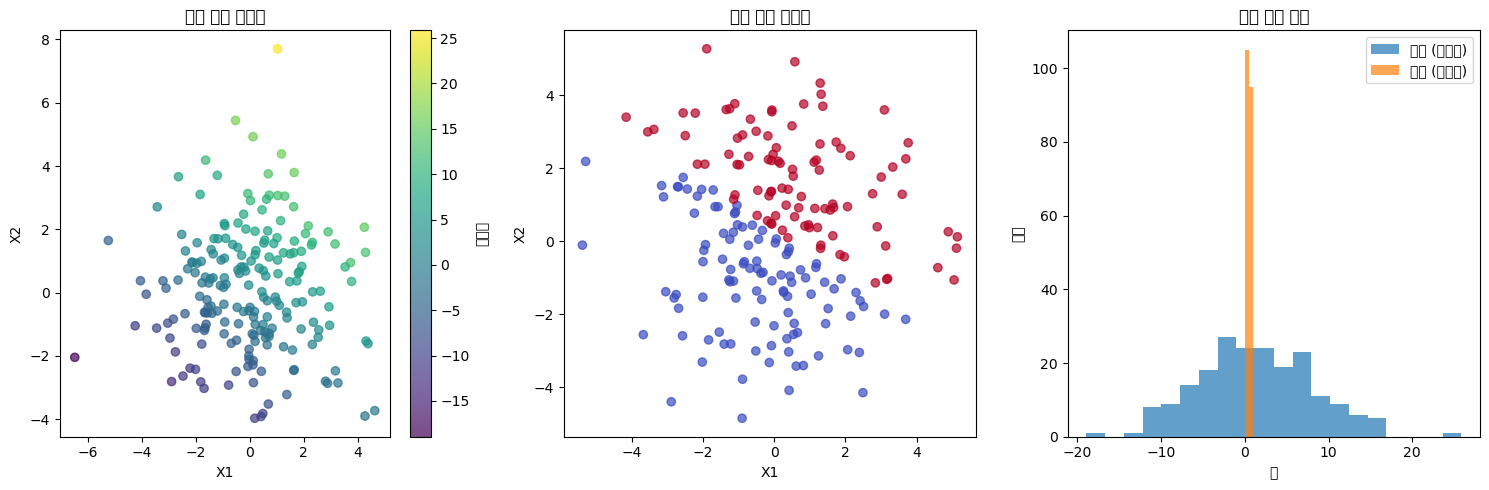

In [9]:
# 1. 데이터 생성 및 준비
print("=== 데이터 생성 및 준비 ===")

# 회귀 문제용 데이터 (연속값 예측)
np.random.seed(42)
n_samples = 200
X_reg = np.random.randn(n_samples, 2) * 2
y_reg = 2 * X_reg[:, 0] + 3 * X_reg[:, 1] + 1 + np.random.randn(n_samples) * 0.5

# 분류 문제용 데이터 (이진 분류)
X_clf = np.random.randn(n_samples, 2) * 2
# 로지스틱 함수를 사용한 이진 분류
z = 2 * X_clf[:, 0] + 3 * X_clf[:, 1] - 1
prob = 1 / (1 + np.exp(-z))  # 시그모이드 함수
y_clf = (prob > 0.5).astype(int)

print(f"회귀 데이터: X shape={X_reg.shape}, y shape={y_reg.shape}")
print(f"분류 데이터: X shape={X_clf.shape}, y shape={y_clf.shape}")
print(f"분류 데이터 클래스 분포: {np.bincount(y_clf)}")

# 데이터 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='viridis', alpha=0.7)
plt.colorbar(label='연속값')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('회귀 문제 데이터')

plt.subplot(1, 3, 2)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='coolwarm', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('분류 문제 데이터')

plt.subplot(1, 3, 3)
plt.hist(y_reg, bins=20, alpha=0.7, label='회귀 (연속값)')
plt.hist(y_clf, bins=2, alpha=0.7, label='분류 (이진값)')
plt.xlabel('값')
plt.ylabel('빈도')
plt.title('타겟 변수 분포')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# 2. 모델 정의 및 학습
print("=== 모델 정의 및 학습 ===")

# 선형 회귀 모델 (회귀 문제용)
linear_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화
])

linear_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    loss='mse',  # 평균 제곱 오차
    metrics=['mae']
)

# 로지스틱 회귀 모델 (분류 문제용)
logistic_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 시그모이드 활성화
])

logistic_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    loss='binary_crossentropy',  # 이진 교차 엔트로피
    metrics=['accuracy']
)

print("선형 회귀 모델 구조:")
linear_model.summary()

print("\n로지스틱 회귀 모델 구조:")
logistic_model.summary()

# 모델 학습
print("\n=== 모델 학습 ===")
linear_history = linear_model.fit(X_reg, y_reg, epochs=100, verbose=0)
logistic_history = logistic_model.fit(X_clf, y_clf, epochs=100, verbose=0)

print("학습 완료!")


=== 모델 정의 및 학습 ===
선형 회귀 모델 구조:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________

로지스틱 회귀 모델 구조:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________

=== 모델 학습 ===
학습 완료!


=== 활성화 함수 비교 ===


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1770531317.py:40: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1770531317.py:40: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1770531317.py:40: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1770531317.py:40: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1770531317.py:40: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipy

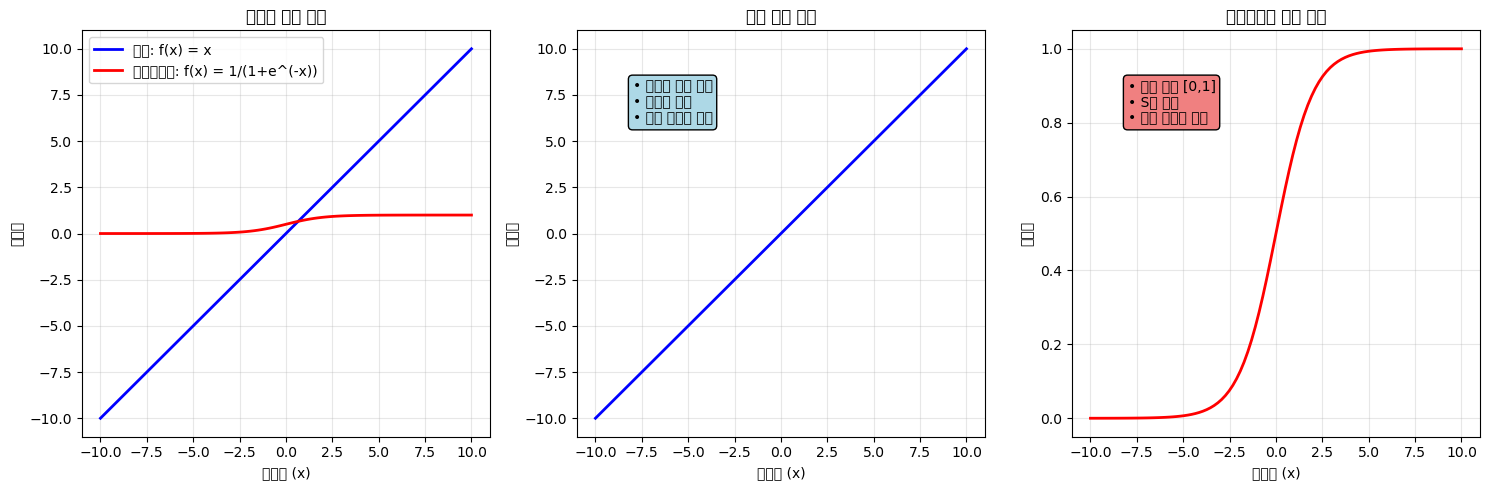

활성화 함수 특징:
선형 함수:
  - 출력 범위: (-∞, +∞)
  - 기울기: 일정 (1)
  - 용도: 연속값 예측 (회귀)

시그모이드 함수:
  - 출력 범위: (0, 1)
  - 기울기: 가변 (중간에서 최대)
  - 용도: 확률 예측 (분류)


In [11]:
# 3. 활성화 함수 비교
print("=== 활성화 함수 비교 ===")

# 선형 함수 vs 시그모이드 함수
x_range = np.linspace(-10, 10, 100)
linear_output = x_range  # 선형: f(x) = x
sigmoid_output = 1 / (1 + np.exp(-x_range))  # 시그모이드: f(x) = 1/(1+e^(-x))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_range, linear_output, 'b-', linewidth=2, label='선형: f(x) = x')
plt.plot(x_range, sigmoid_output, 'r-', linewidth=2, label='시그모이드: f(x) = 1/(1+e^(-x))')
plt.xlabel('입력값 (x)')
plt.ylabel('출력값')
plt.title('활성화 함수 비교')
plt.legend()
plt.grid(True, alpha=0.3)

# 선형 함수의 특징
plt.subplot(1, 3, 2)
plt.plot(x_range, linear_output, 'b-', linewidth=2)
plt.xlabel('입력값 (x)')
plt.ylabel('출력값')
plt.title('선형 함수 특징')
plt.text(-8, 6, '• 무제한 출력 범위\n• 기울기 일정\n• 회귀 문제에 적합', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.grid(True, alpha=0.3)

# 시그모이드 함수의 특징
plt.subplot(1, 3, 3)
plt.plot(x_range, sigmoid_output, 'r-', linewidth=2)
plt.xlabel('입력값 (x)')
plt.ylabel('출력값')
plt.title('시그모이드 함수 특징')
plt.text(-8, 0.8, '• 출력 범위 [0,1]\n• S자 곡선\n• 분류 문제에 적합', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("활성화 함수 특징:")
print("선형 함수:")
print("  - 출력 범위: (-∞, +∞)")
print("  - 기울기: 일정 (1)")
print("  - 용도: 연속값 예측 (회귀)")

print("\n시그모이드 함수:")
print("  - 출력 범위: (0, 1)")
print("  - 기울기: 가변 (중간에서 최대)")
print("  - 용도: 확률 예측 (분류)")


=== 손실 함수 비교 ===
MSE (회귀용): 0.0250
Binary Crossentropy (분류용): 0.1643


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/2938567679.py:57: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/2938567679.py:57: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/2938567679.py:57: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/2938567679.py:57: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/2938567679.py:57: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel

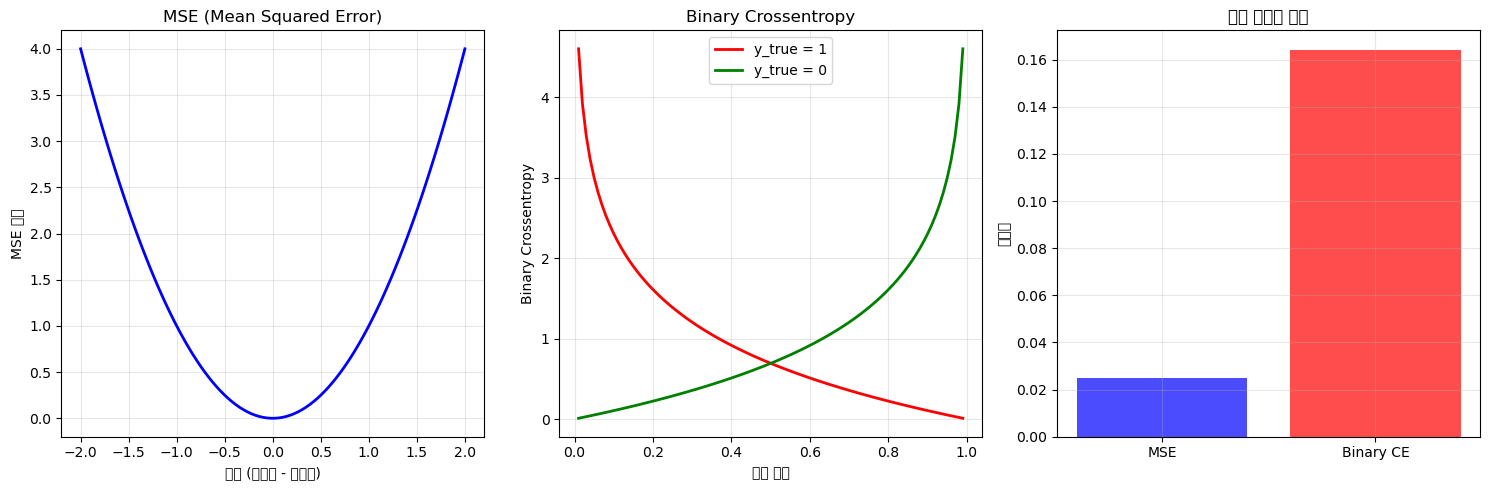


손실 함수 특징:
MSE (평균 제곱 오차):
  - 연속값 예측에 적합
  - 큰 오차에 민감
  - 미분 가능하고 최적화 용이

Binary Crossentropy (이진 교차 엔트로피):
  - 확률 예측에 적합
  - 확률이 0 또는 1에 가까울수록 큰 손실
  - 분류 성능과 직접 연관


In [12]:
# 4. 손실 함수 비교
print("=== 손실 함수 비교 ===")

# MSE vs Binary Crossentropy
y_true_reg = np.array([1.0, 2.0, 3.0, 4.0])
y_pred_reg = np.array([1.2, 1.8, 3.1, 3.9])

y_true_clf = np.array([1, 0, 1, 0])
y_pred_clf = np.array([0.9, 0.1, 0.8, 0.2])

# MSE 계산
mse = np.mean((y_true_reg - y_pred_reg) ** 2)

# Binary Crossentropy 계산
def binary_crossentropy(y_true, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

bce = binary_crossentropy(y_true_clf, y_pred_clf)

print(f"MSE (회귀용): {mse:.4f}")
print(f"Binary Crossentropy (분류용): {bce:.4f}")

# 손실 함수 시각화
plt.figure(figsize=(15, 5))

# MSE 시각화
plt.subplot(1, 3, 1)
x_range = np.linspace(-2, 2, 100)
mse_values = x_range ** 2
plt.plot(x_range, mse_values, 'b-', linewidth=2)
plt.xlabel('오차 (실제값 - 예측값)')
plt.ylabel('MSE 손실')
plt.title('MSE (Mean Squared Error)')
plt.grid(True, alpha=0.3)

# Binary Crossentropy 시각화
plt.subplot(1, 3, 2)
prob_range = np.linspace(0.01, 0.99, 100)
bce_class1 = -np.log(prob_range)  # y_true = 1일 때
bce_class0 = -np.log(1 - prob_range)  # y_true = 0일 때
plt.plot(prob_range, bce_class1, 'r-', linewidth=2, label='y_true = 1')
plt.plot(prob_range, bce_class0, 'g-', linewidth=2, label='y_true = 0')
plt.xlabel('예측 확률')
plt.ylabel('Binary Crossentropy')
plt.title('Binary Crossentropy')
plt.legend()
plt.grid(True, alpha=0.3)

# 실제 예시
plt.subplot(1, 3, 3)
plt.bar(['MSE', 'Binary CE'], [mse, bce], color=['blue', 'red'], alpha=0.7)
plt.ylabel('손실값')
plt.title('실제 손실값 비교')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n손실 함수 특징:")
print("MSE (평균 제곱 오차):")
print("  - 연속값 예측에 적합")
print("  - 큰 오차에 민감")
print("  - 미분 가능하고 최적화 용이")

print("\nBinary Crossentropy (이진 교차 엔트로피):")
print("  - 확률 예측에 적합")
print("  - 확률이 0 또는 1에 가까울수록 큰 손실")
print("  - 분류 성능과 직접 연관")


=== 학습 결과 비교 ===
선형 회귀 성능:
  R² 점수: 0.9941
  MAE: 0.4179

로지스틱 회귀 성능:
  정확도: 0.9900
  분류 리포트:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.98      0.99        95

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1894543424.py:56: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1894543424.py:56: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1894543424.py:56: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1894543424.py:56: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39860/1894543424.py:56: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipyke

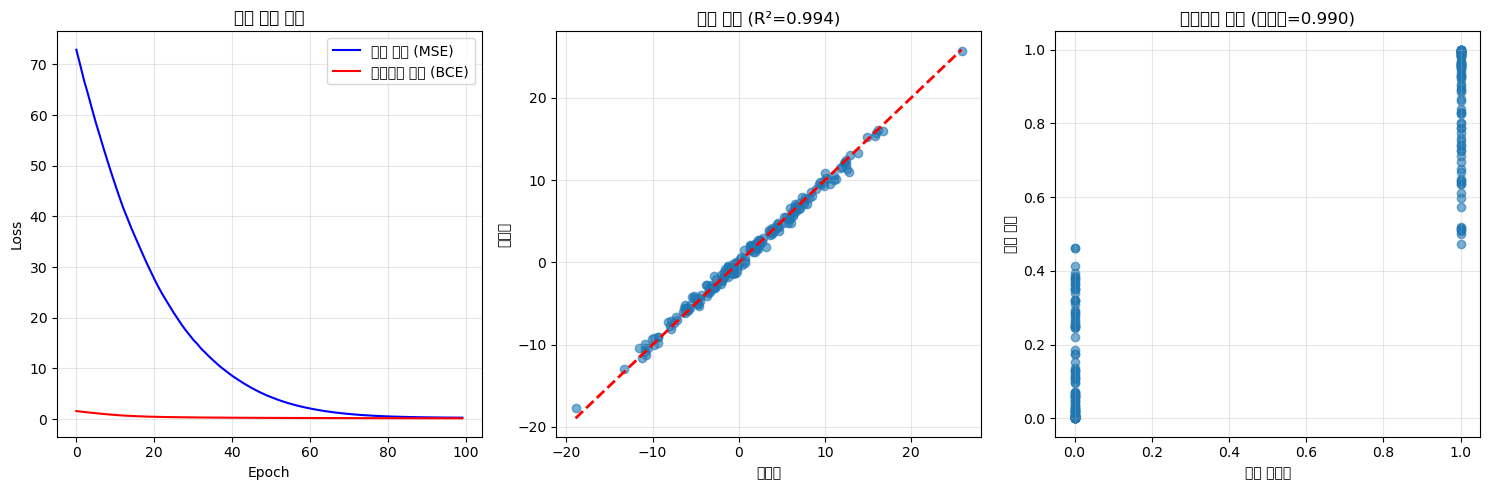

In [13]:
# 5. 학습 결과 비교
print("=== 학습 결과 비교 ===")

# 예측값 계산
y_pred_linear = linear_model.predict(X_reg, verbose=0)
y_pred_logistic = logistic_model.predict(X_clf, verbose=0)

# 성능 평가
from sklearn.metrics import r2_score, accuracy_score, classification_report

# 선형 회귀 성능
r2 = r2_score(y_reg, y_pred_linear)
mae = np.mean(np.abs(y_reg - y_pred_linear.flatten()))

# 로지스틱 회귀 성능
y_pred_binary = (y_pred_logistic > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_clf, y_pred_binary)

print(f"선형 회귀 성능:")
print(f"  R² 점수: {r2:.4f}")
print(f"  MAE: {mae:.4f}")

print(f"\n로지스틱 회귀 성능:")
print(f"  정확도: {accuracy:.4f}")
print(f"  분류 리포트:")
print(classification_report(y_clf, y_pred_binary))

# 학습 곡선 비교
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(linear_history.history['loss'], 'b-', label='선형 회귀 (MSE)')
plt.plot(logistic_history.history['loss'], 'r-', label='로지스틱 회귀 (BCE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('학습 곡선 비교')
plt.legend()
plt.grid(True, alpha=0.3)

# 예측 결과 시각화
plt.subplot(1, 3, 2)
plt.scatter(y_reg, y_pred_linear, alpha=0.6)
plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title(f'선형 회귀 (R²={r2:.3f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(y_clf, y_pred_logistic, alpha=0.6)
plt.xlabel('실제 클래스')
plt.ylabel('예측 확률')
plt.title(f'로지스틱 회귀 (정확도={accuracy:.3f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 로지스틱 회귀 vs 선형 회귀 종합 비교

### 1. **문제 유형**
| 구분 | 선형 회귀 | 로지스틱 회귀 |
|------|-----------|---------------|
| **목적** | 연속값 예측 | 이진 분류 |
| **출력** | 실수값 | 확률값 (0~1) |
| **예시** | 주택 가격, 온도 | 스팸 여부, 질병 진단 |

### 2. **수학적 차이**
| 구분 | 선형 회귀 | 로지스틱 회귀 |
|------|-----------|---------------|
| **활성화 함수** | f(x) = x (선형) | f(x) = 1/(1+e^(-x)) (시그모이드) |
| **출력 범위** | (-∞, +∞) | (0, 1) |
| **손실 함수** | MSE | Binary Crossentropy |

### 3. **활용 분야**
- **선형 회귀**: 가격 예측, 수요 예측, 성능 분석
- **로지스틱 회귀**: 의료 진단, 마케팅, 품질 관리

### 4. **해석 방법**
- **선형 회귀**: "X가 1 증가하면 Y가 β만큼 증가"
- **로지스틱 회귀**: "X가 1 증가하면 Y=1일 확률이 β배 증가"

### 5. **성능 평가**
- **선형 회귀**: R², MAE, RMSE
- **로지스틱 회귀**: 정확도, 정밀도, 재현율, F1-score


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.12.0


## 1. 데이터 불러오기 및 전처리

In [2]:
# ----------------------
# 1. 데이터 불러오기
# ----------------------
iris = load_iris()
X = iris.data[:, :2]  # 꽃받침 길이, 꽃받침 너비 (2개 feature만 사용해서 시각화 쉽게)
y = (iris.target == 0).astype(np.float32)  # Setosa = 1, Others = 0

print("X shape:", X.shape, "y shape:", y.shape)

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X shape: (150, 2) y shape: (150,)


## 2. 모델 정의

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 컴파일
- 손실 함수: MSE (Mean Squared Error)
- 최적화 방법: SGD (Stochastic Gradient Descent)

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4. 모델 학습

2025-09-16 20:55:08.789219: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


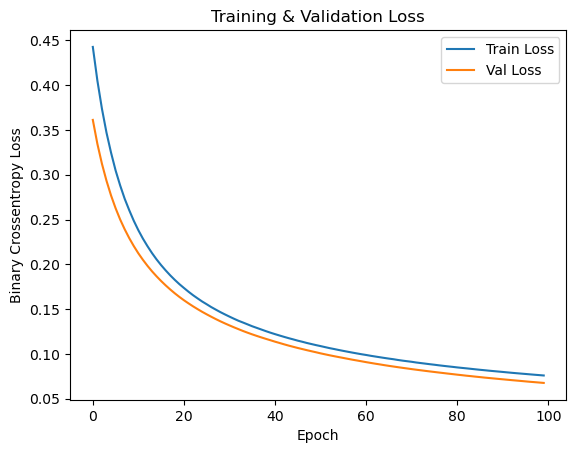

In [6]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=0)

# ----------------------
# 5. 학습 곡선 확인
# ----------------------
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 5. 결과 확인

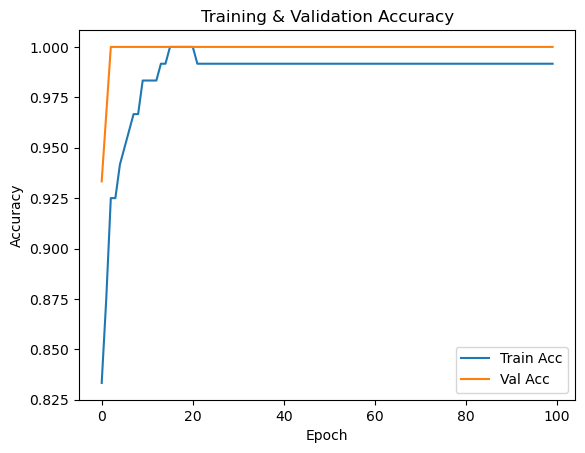

테스트 정확도: 1.000


In [7]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

# ----------------------
# 6. 모델 평가
# ----------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

1250/1250 [==============================] - 0s 159us/step


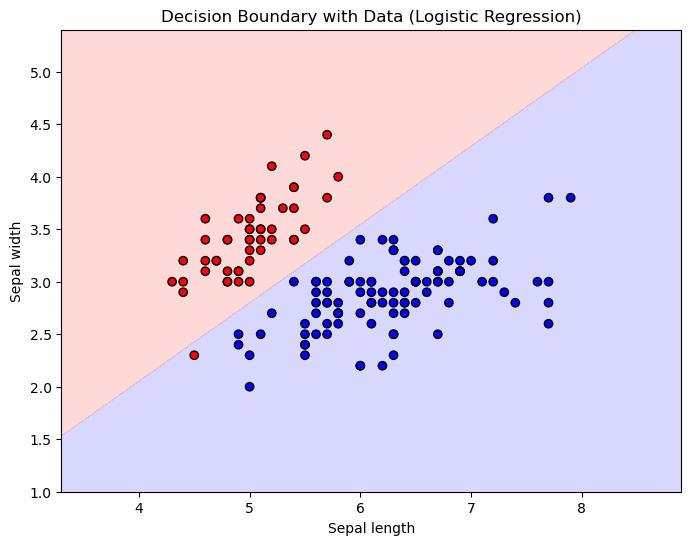

In [8]:
# ----------------------
# 결정 경계 + 전체 데이터 시각화
# ----------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
grid = scaler.transform(grid)
probs = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))

# 결정 경계 (배경 색)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, cmap="bwr")

# 전체 데이터 산점도 (훈련+테스트)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision Boundary with Data (Logistic Regression)")
plt.show()

## 생각해보기
- 로지스틱 회귀 모델과 선형 회귀 모델의 차이는?

선형회귀는 이진 분류, 로지스틱 회귀는 연속값 예측

- Learning Rate(학습률)의 역할은 무엇인가요?
- 너무 크거나 너무 작은 학습률을 사용하면 어떤 일이 발생하나?

정답을 찾아가는 정도이고 너무 크면 빠르게 하지만 정확도가 맞지 않고